### Hashem Almhimed

In [49]:
# requierments.txt
"""
pandas
numpy
matplotlib
scikit-learn
torch
seaborn
imblearn

"""

'\npandas\nnumpy\nmatplotlib\nscikit-learn\ntorch\nseaborn\nimblearn\n'

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Load dataaset
dataset = pd.read_csv('personen_datensatz.csv', delimiter=';') 
dataset.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,1,72.0,170.0,80,M.Eng.,blau,65k
1,2,25.0,197.0,107,B.A.,schwarz,65k
2,3,46.0,193.0,103,B.Sc.,NaN,65k
3,4,59.0,160.0,70,NaN,schwarz,30k
4,5,50.0,198.0,108,M.Sc.,gruen,60k


# Statiscs about the Dataset

In [4]:
dataset_count = dataset.count()
# Check for missing values
missing_vlaues_count = dataset.isnull().sum()
# Check for duplicates
duplicated_values_count = dataset.duplicated().sum()
# Check data types
data_typs = dataset.dtypes
print("Dataset Count:\n", dataset_count)
print("\nMissing Values Count:\n", missing_vlaues_count)
print("\nDuplicated Values Count:\n", duplicated_values_count)
print("\nData Types:\n", data_typs)

# Dataset description
dataset_description = dataset.describe()
print("\nDataset Description:\n", dataset_description)

# information about the non-numerical columns
non_numerical_info = dataset.select_dtypes(include=['object']).describe()
print("\nNon-Numerical Columns Information:\n", non_numerical_info)

Dataset Count:
 Person Nr.      1000
Alter            982
Groesse (cm)     985
Gewicht (kg)    1000
Abschluss        862
Augenfarbe       788
Einkommen        876
dtype: int64

Missing Values Count:
 Person Nr.        0
Alter            18
Groesse (cm)     15
Gewicht (kg)      0
Abschluss       138
Augenfarbe      212
Einkommen       124
dtype: int64

Duplicated Values Count:
 0

Data Types:
 Person Nr.        int64
Alter           float64
Groesse (cm)    float64
Gewicht (kg)      int64
Abschluss        object
Augenfarbe       object
Einkommen        object
dtype: object

Dataset Description:
         Person Nr.       Alter  Groesse (cm)  Gewicht (kg)
count  1000.000000  982.000000    985.000000   1000.000000
mean    500.500000   58.990835    179.894416     89.897000
std     288.819436   23.834182     18.054035     18.007461
min       1.000000   18.000000    150.000000     60.000000
25%     250.750000   39.000000    164.000000     74.000000
50%     500.500000   59.000000    179.000000 

We see that the target(Einkommen) has 9 unique values and we will go forward with Classification rather than Regression

# Visualaisation

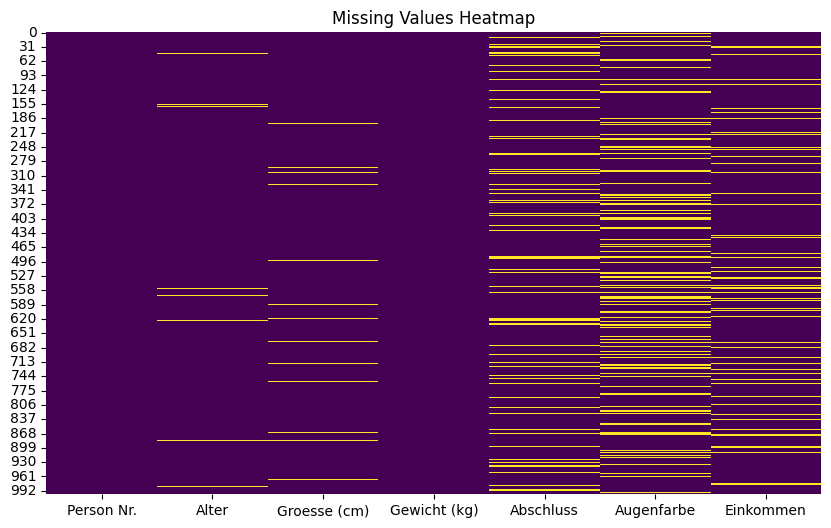

In [5]:
# Visualize the missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


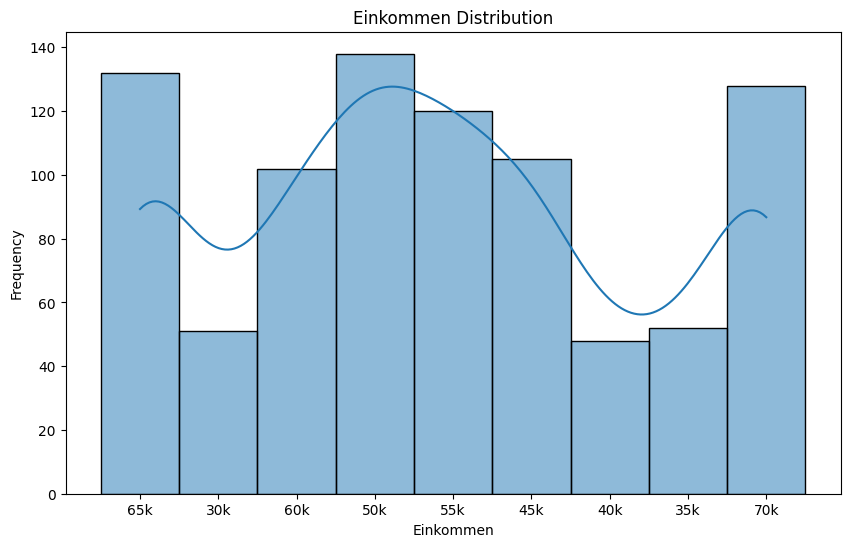

In [6]:
# Visualize the distribution of a Einkommen column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Einkommen'], bins=30, kde=True)
plt.title('Einkommen Distribution')
plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.show()


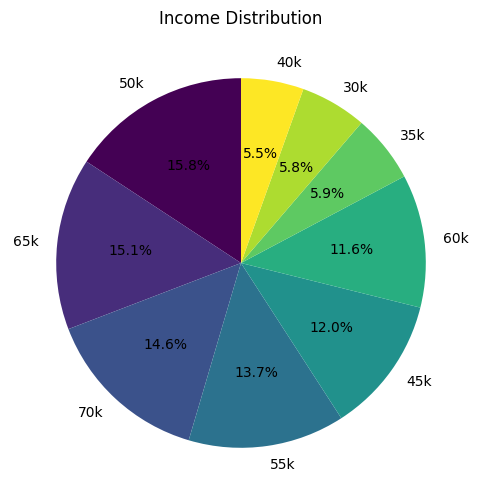

In [7]:
# Pie chart for Einkommen distribution
income_counts = dataset['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('') 
plt.show()

In [8]:
# check the uniqe values of each categorical feature
categorical_columns = ['Abschluss', 'Augenfarbe', 'Einkommen']
for column in categorical_columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Abschluss': ['M.Eng.' 'B.A.' 'B.Sc.' nan 'M.Sc.' 'M.A.' 'B.Eng.']
Unique values in 'Augenfarbe': ['blau' 'schwarz' nan 'gruen' 'braun']
Unique values in 'Einkommen': ['65k' '30k' '60k' '50k' nan '55k' '45k' '40k' '35k' '70k']


From here and above we can notice that there are missing values in the categorical features the "nan" is being counted as a unique value. So that we need to handel the missing values issues before the encoding.

# Data Preprocessing

## Data Transformation

In [9]:
dataset.head()
# remove personen Nr. column
dataset = dataset.drop(columns=['Person Nr.'])

### Handling missing values
We will handel missing values as below:
1. using mean strategy for the numerical columns
2. using most-frequent strategy for the categorical features

In [10]:
# Handle missing values in numerical columns using SimpleImputer(mean strategy)
from sklearn.impute import SimpleImputer

numerical_columns = dataset.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# Check if missing values are handled
print(dataset[numerical_columns].isnull().sum())

Alter           0
Groesse (cm)    0
Gewicht (kg)    0
dtype: int64


In [11]:
# Handle missing values in categorical columns using SimpleImputer(most_frequent strategy)
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
dataset[categorical_columns] = categorical_imputer.fit_transform(dataset[categorical_columns])

# Check if missing values are handled
print(dataset[categorical_columns].isnull().sum())

Abschluss     0
Augenfarbe    0
Einkommen     0
dtype: int64


In [12]:
dataset.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,M.Eng.,blau,65k
1,25.0,197.0,107.0,B.A.,schwarz,65k
2,46.0,193.0,103.0,B.Sc.,gruen,65k
3,59.0,160.0,70.0,M.Eng.,schwarz,30k
4,50.0,198.0,108.0,M.Sc.,gruen,60k


### Feature Encoding
As ordinal encoder is bested for decision tree models because it does not create dummy variables and keeps the ordinal relationship between categories, we will use it to encode the categorical features.

In [13]:
# Encode categorical columns using OrdinalEncoder(As we deal with Decision Tree Classification, we can use Ordinal Encoding as it can handle ordinal relationships)
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
encoded_data = ordinal_encoder.fit_transform(dataset[categorical_columns])

# Create a DataFrame for the encoded data
encoded_columns = categorical_columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded data with the original dataset (excluding original categorical columns)
dataset_encoded = pd.concat([dataset.drop(columns=categorical_columns).reset_index(drop=True), encoded_df], axis=1)

dataset_encoded.head()

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,4.0,0.0,7.0
1,25.0,197.0,107.0,0.0,3.0,7.0
2,46.0,193.0,103.0,2.0,2.0,7.0
3,59.0,160.0,70.0,4.0,3.0,0.0
4,50.0,198.0,108.0,5.0,2.0,6.0


In [14]:
# separate features and target variable (As we perform the further preprocessing on the encoded dataset excluding the target variable(we need it to stay in the same format as encoded categories))
encoded_features = dataset_encoded.drop(columns=['Einkommen'])
target = dataset_encoded['Einkommen']

### Feature Scaling
We are suing Min-Max scaler on all features to bring the values in same range

In [ ]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
skalierte_features = minmax_scaler.fit_transform(encoded_features.values)
skalierte_features = pd.DataFrame(skalierte_features, columns=encoded_features.columns)
skalierte_features.head(10)

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.333333,0.8,0.000000
1,0.085366,0.783333,0.783333,0.0,1.000000
2,0.341463,0.716667,0.716667,0.4,0.666667
3,0.500000,0.166667,0.166667,0.8,1.000000
4,0.390244,0.800000,0.800000,1.0,0.666667
5,0.987805,0.566667,0.566667,0.6,0.000000
6,0.280488,0.583333,0.583333,0.8,0.000000
7,0.536585,0.133333,0.133333,0.8,0.333333
8,0.987805,0.766667,0.766667,1.0,0.666667
9,0.268293,0.600000,0.600000,0.2,0.666667


### Feature Selection
- Removing constant and duplicated features (in this dataset we have no such features)
- Based on the correlation matrix we remove on of each two highly correlated features ( based on the correlation, we found that Grosse and Gewicht are highly correlated, so we remove Grosse)

In [18]:
# Konstante Merkmale (there are no konstante Merkmale in this dataset)
schwellenwert = 1

konstante_merkmale = []

for merkmale in skalierte_features.columns:
    prozentsatz_des_wertes = skalierte_features[merkmale].loc[skalierte_features[merkmale] == skalierte_features[merkmale][0]].count() / skalierte_features[merkmale].count()

    if prozentsatz_des_wertes >= 0.95:
        konstante_merkmale.append(merkmale)   

dataset = skalierte_features.drop(labels=konstante_merkmale, axis=1)

print("Konstante Merkmale:", konstante_merkmale)
print("Shape of data without constant features:", dataset.shape)
print(dataset.head())

Konstante Merkmale: []
Shape of data without constant features: (1000, 5)
      Alter  Groesse (cm)  Gewicht (kg)  Abschluss  Augenfarbe
0  0.658537      0.333333      0.333333        0.8    0.000000
1  0.085366      0.783333      0.783333        0.0    1.000000
2  0.341463      0.716667      0.716667        0.4    0.666667
3  0.500000      0.166667      0.166667        0.8    1.000000
4  0.390244      0.800000      0.800000        1.0    0.666667


In [19]:
# Duplizierende Merkmale
daten_t = dataset.T

duplizierte_merkmale = daten_t[daten_t.duplicated()].index.values
print(duplizierte_merkmale)

dataset = dataset.drop(labels=duplizierte_merkmale, axis=1)
dataset.head(6)

[]


,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.333333,0.8,0.000000
1,0.085366,0.783333,0.783333,0.0,1.000000
2,0.341463,0.716667,0.716667,0.4,0.666667
3,0.500000,0.166667,0.166667,0.8,1.000000
4,0.390244,0.800000,0.800000,1.0,0.666667
5,0.987805,0.566667,0.566667,0.6,0.000000


In [97]:
#pip install seaborn

<Axes: >

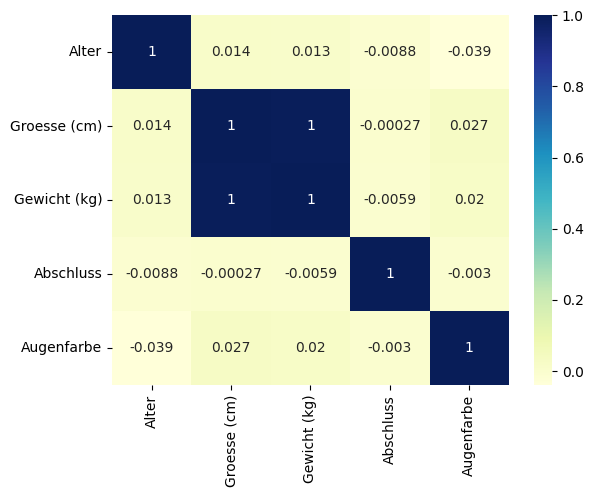

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the correlation matrix to find relationships between features
pearson = dataset.corr(method='pearson')

sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [22]:
#  Feature Selection: based on the correlation matrix, we that the Grosse and Gewicht are highly correlated, so we can remove one of them
# remove the 'gewicht' column
dataset = dataset.drop(columns=['Groesse (cm)'])
dataset.head()

,Alter,Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.8,0.000000
1,0.085366,0.783333,0.0,1.000000
2,0.341463,0.716667,0.4,0.666667
3,0.500000,0.166667,0.8,1.000000
4,0.390244,0.800000,1.0,0.666667


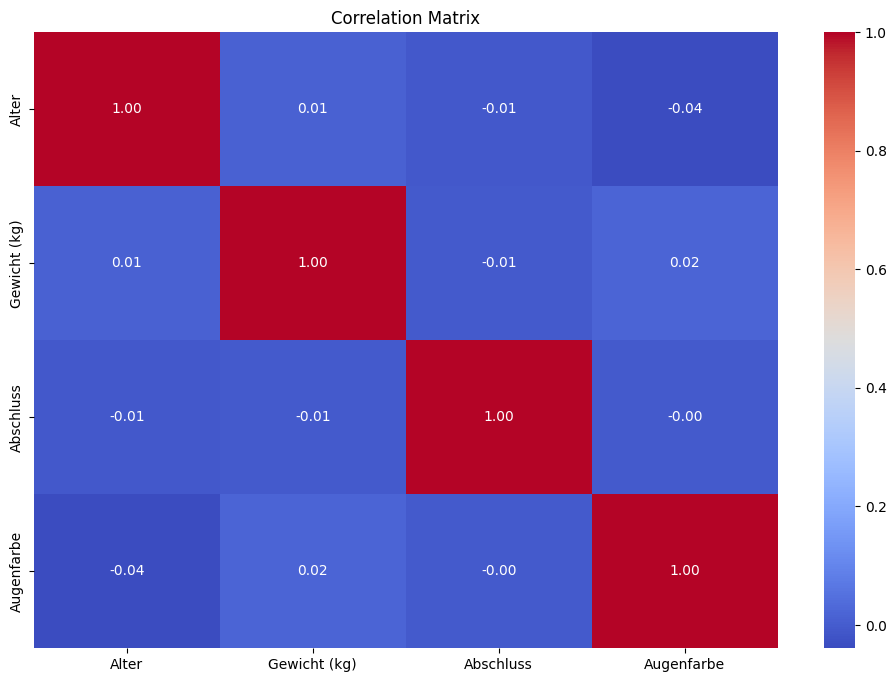

In [23]:
# Calculate the Pearson correlation matrix (We can see now that there are no highly correlated features)
correlation_matrix = dataset.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [24]:
# Automatically remove highly correlated features
corr = dataset.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = dataset.columns[columns]
print(selected_columns.shape)
X = dataset[selected_columns]
X.head()

(4,)


,Alter,Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.8,0.000000
1,0.085366,0.783333,0.0,1.000000
2,0.341463,0.716667,0.4,0.666667
3,0.500000,0.166667,0.8,1.000000
4,0.390244,0.800000,1.0,0.666667


# Postprocessing

In [25]:
X.shape
y = target.astype(int)  # Convert y to integer classes for classification

In [26]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (800, 4)
Testing Features Shape: (200, 4)
Training Target Shape: (800,)
Testing Target Shape: (200,)


In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [28]:
y.describe()

count    1000.000000
mean        4.671000
std         2.213517
min         0.000000
25%         3.000000
50%         4.000000
75%         7.000000
max         8.000000
Name: Einkommen, dtype: float64

# Fit the DT Classifier

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy and tree visualization

In [30]:
# Model Accuracy, how often is the classifier correct?
y_pred_train = clf.predict(X_train)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))


Training Accuracy: 0.99625
Test Accuracy: 0.115


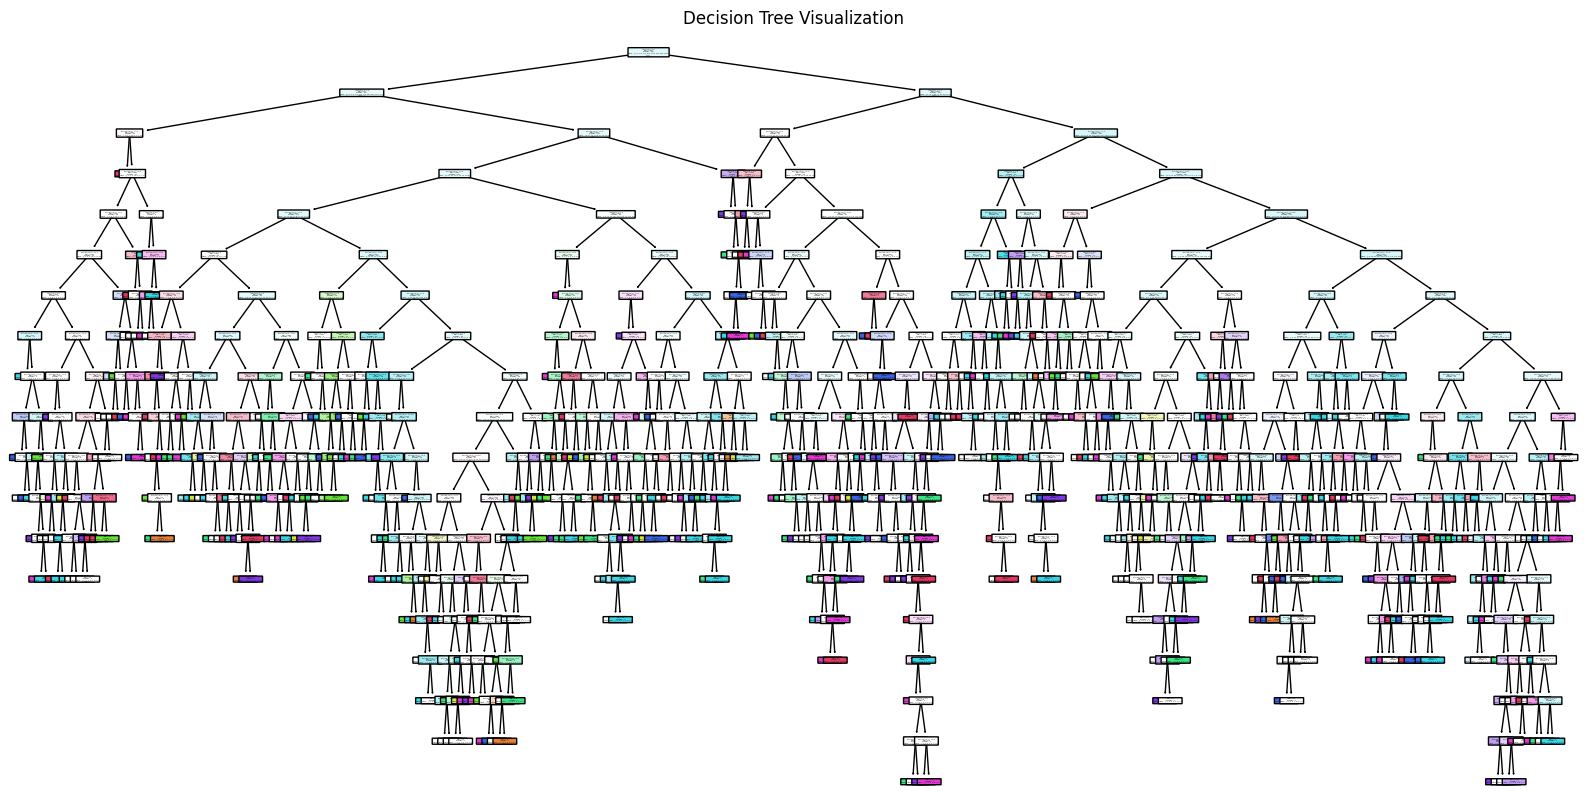

In [36]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Hyperparameters tuning

In [31]:
# Using the grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.24749999999999997


# Evaluation


## Conclusion of the Evaluation
Conclusion of the Evaluation
Notes:
- The accuracy and other metrics (precision, recall, F1-score) indicate that the model has limited predictive power for this multi-class classification problem.
- The confusion matrix shows that the model struggles to distinguish between certain income classes, resulting in many misclassifications.
- The dataset is biased, and as a result, the model performs poorly on some classes.
- The learning curves, along with the high training score and low test and validation accuracy, indicate that the model is facing an overfitting problem.

To address these issues, we should consider the following actions:

- Add more samples to the dataset (synthetic data, oversampling, augmented data, etc.).
- Fill in the missing values in a more appropriate manner to improve data consistency.
- Solve the imbalanced dataset issue by collecting more data or applying oversampling/undersampling techniques.
- We may also explore more complex models, such as Random Forests or Neural Networks, which can capture non-linear relationships and reduce overfitting.


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.00      0.00      0.00        13
           2       0.12      0.11      0.12         9
           3       0.17      0.15      0.16        20
           4       0.22      0.25      0.23        51
           5       0.15      0.11      0.12        28
           6       0.10      0.12      0.11        17
           7       0.05      0.04      0.04        27
           8       0.00      0.00      0.00        17

    accuracy                           0.12       200
   macro avg       0.09      0.09      0.09       200
weighted avg       0.11      0.12      0.11       200

Accuracy: 0.115
Precision (macro): 0.08902116402116401
Recall (macro): 0.08642666943320537
F1 Score (macro): 0.0868562060512525


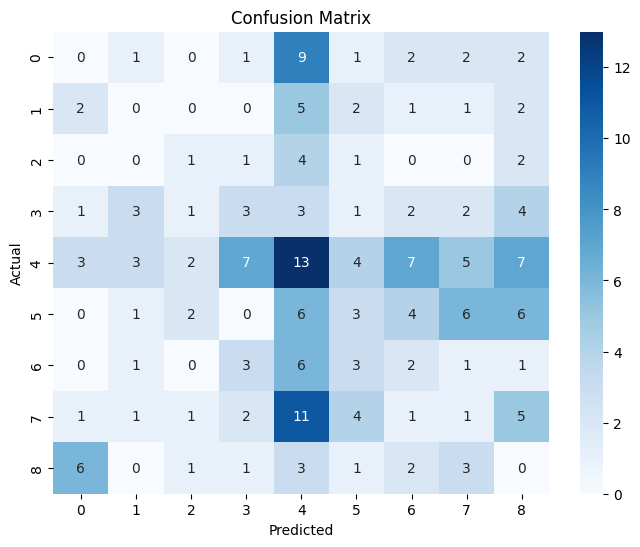

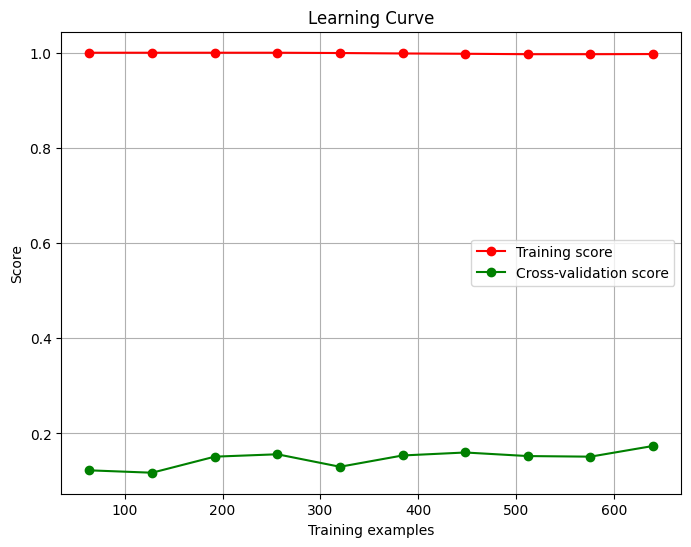

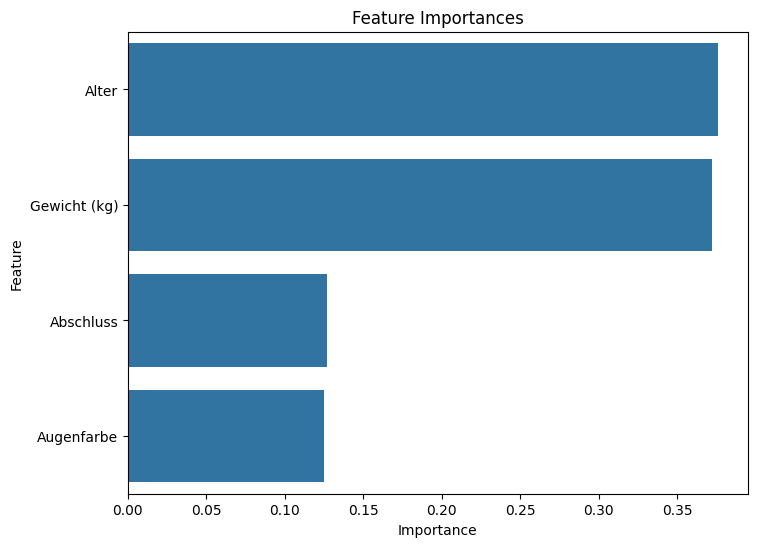

In [33]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import numpy as np

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, 
)
import matplotlib.pyplot as plt

# 1. Classification Report & Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()



# 4. Feature Importance
if hasattr(clf, "feature_importances_"):
    plt.figure(figsize=(8,6))
    sns.barplot(x=clf.feature_importances_, y=X.columns)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Balancing the Dataset
- We will go futher with one of the above mention methods to improve the performance of the model by handling the imbalanced dataset issue by using "imblearn" library to randomly add samples to the dataset so that all classes have the same number of samples.
- We will just repeate same steps above focuing on the solving the imbalance the dataset

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataaset
dataset = pd.read_csv('personen_datensatz.csv', delimiter=';') 
dataset.head()

,Person Nr.,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,1,72.0,170.0,80,M.Eng.,blau,65k
1,2,25.0,197.0,107,B.A.,schwarz,65k
2,3,46.0,193.0,103,B.Sc.,NaN,65k
3,4,59.0,160.0,70,NaN,schwarz,30k
4,5,50.0,198.0,108,M.Sc.,gruen,60k


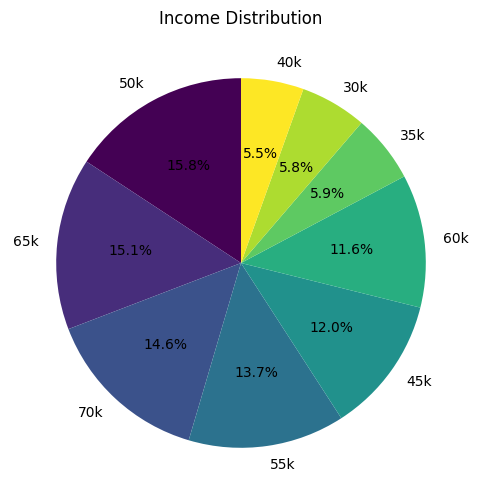

In [3]:
# Pie chart for Einkommen distribution
income_counts = dataset['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('') 
plt.show()

In [4]:
dataset.head()
# remove personen Nr. column
dataset = dataset.drop(columns=['Person Nr.'])

In [7]:
# check the uniqe values of each categorical feature
categorical_columns = ['Abschluss', 'Augenfarbe', 'Einkommen']
for column in categorical_columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Abschluss': ['M.Eng.' 'B.A.' 'B.Sc.' nan 'M.Sc.' 'M.A.' 'B.Eng.']
Unique values in 'Augenfarbe': ['blau' 'schwarz' nan 'gruen' 'braun']
Unique values in 'Einkommen': ['65k' '30k' '60k' '50k' nan '55k' '45k' '40k' '35k' '70k']


In [8]:
# Handle missing values in numerical columns using SimpleImputer(mean strategy)
from sklearn.impute import SimpleImputer

numerical_columns = dataset.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# Check if missing values are handled
print(dataset[numerical_columns].isnull().sum())

Alter           0
Groesse (cm)    0
Gewicht (kg)    0
dtype: int64


In [9]:
# Handle missing values in categorical columns using SimpleImputer(most_frequent strategy)
from sklearn.impute import SimpleImputer

categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
dataset[categorical_columns] = categorical_imputer.fit_transform(dataset[categorical_columns])

# Check if missing values are handled
print(dataset[categorical_columns].isnull().sum())

Abschluss     0
Augenfarbe    0
Einkommen     0
dtype: int64


# Balancing the Dataset

After using imblearn to balance the dataset, we can see that each class has the same number of samples (same as the highest before the balancing)

In [41]:
#pip install imblearn

In [10]:
# Oversample each class to match the size of the largest class

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(dataset.drop(columns=['Einkommen']), dataset['Einkommen'])

# Combine back into a DataFrame
dataset_balanced = pd.concat([pd.DataFrame(X_resampled, columns=dataset.drop(columns=['Einkommen']).columns), 
                              pd.Series(y_resampled, name='Einkommen')], axis=1)

print(dataset_balanced['Einkommen'].value_counts())

Einkommen
65k    262
30k    262
60k    262
50k    262
55k    262
45k    262
40k    262
35k    262
70k    262
Name: count, dtype: int64


The distribution of the Einkommen after oversampling

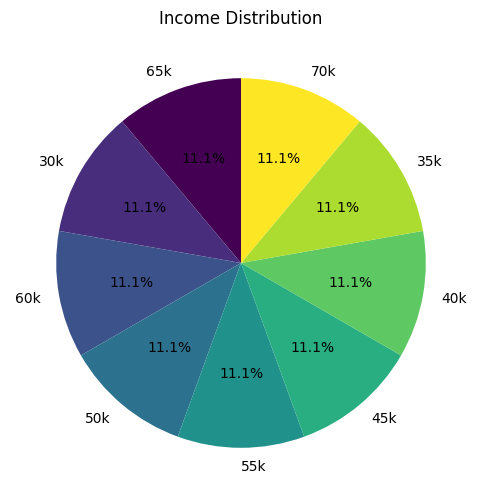

In [12]:
# Pie chart for Einkommen distribution
income_counts = dataset_balanced['Einkommen'].value_counts()
plt.figure(figsize=(10, 6))
income_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Income Distribution')
plt.ylabel('') 
plt.show()

In [34]:
# Encode categorical columns using OrdinalEncoder(As we deal with Decision Tree Classification, we can use Ordinal Encoding as it can handle ordinal relationships)
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical columns
encoded_data = ordinal_encoder.fit_transform(dataset_balanced[categorical_columns])

# Create a DataFrame for the encoded data
encoded_columns = categorical_columns
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Concatenate the encoded data with the original dataset (excluding original categorical columns)
dataset_encoded = pd.concat([dataset_balanced.drop(columns=categorical_columns).reset_index(drop=True), encoded_df], axis=1)

dataset_encoded.head()


,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe,Einkommen
0,72.0,170.0,80.0,4.0,0.0,7.0
1,25.0,197.0,107.0,0.0,3.0,7.0
2,46.0,193.0,103.0,2.0,2.0,7.0
3,59.0,160.0,70.0,4.0,3.0,0.0
4,50.0,198.0,108.0,5.0,2.0,6.0


In [35]:
# separate features and target variable
encoded_features = dataset_encoded.drop(columns=['Einkommen'])
target = dataset_encoded['Einkommen']

In [36]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
skalierte_features = minmax_scaler.fit_transform(encoded_features.values)
skalierte_features = pd.DataFrame(skalierte_features, columns=encoded_features.columns)
skalierte_features.head(10)

,Alter,Groesse (cm),Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.333333,0.8,0.000000
1,0.085366,0.783333,0.783333,0.0,1.000000
2,0.341463,0.716667,0.716667,0.4,0.666667
3,0.500000,0.166667,0.166667,0.8,1.000000
4,0.390244,0.800000,0.800000,1.0,0.666667
5,0.987805,0.566667,0.566667,0.6,0.000000
6,0.280488,0.583333,0.583333,0.8,0.000000
7,0.536585,0.133333,0.133333,0.8,0.333333
8,0.987805,0.766667,0.766667,1.0,0.666667
9,0.268293,0.600000,0.600000,0.2,0.666667


In [37]:
# Konstante Merkmale (there are no konstante Merkmale in this dataset)
schwellenwert = 1

konstante_merkmale = []

for merkmale in skalierte_features.columns:
    prozentsatz_des_wertes = skalierte_features[merkmale].loc[skalierte_features[merkmale] == skalierte_features[merkmale][0]].count() / skalierte_features[merkmale].count()

    if prozentsatz_des_wertes >= 0.95:
        konstante_merkmale.append(merkmale)   

ohne_konstante_data = skalierte_features.drop(labels=konstante_merkmale, axis=1)

print("Konstante Merkmale:", konstante_merkmale)
print("Shape of data without constant features:", ohne_konstante_data.shape)
print(ohne_konstante_data.head())

Konstante Merkmale: []
Shape of data without constant features: (2358, 5)
      Alter  Groesse (cm)  Gewicht (kg)  Abschluss  Augenfarbe
0  0.658537      0.333333      0.333333        0.8    0.000000
1  0.085366      0.783333      0.783333        0.0    1.000000
2  0.341463      0.716667      0.716667        0.4    0.666667
3  0.500000      0.166667      0.166667        0.8    1.000000
4  0.390244      0.800000      0.800000        1.0    0.666667


<Axes: >

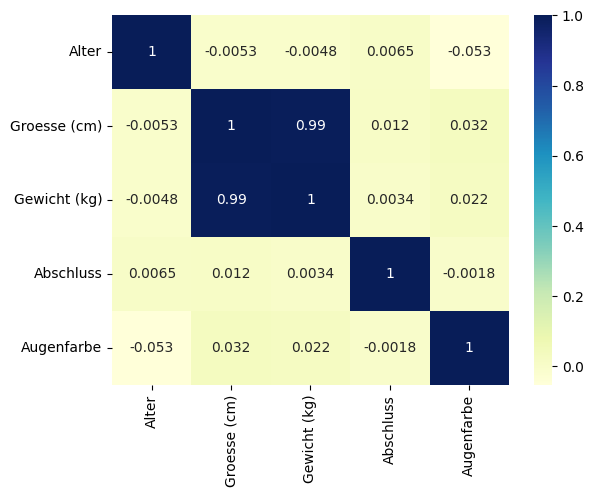

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the correlation matrix to find relationships between features
pearson = ohne_konstante_data.corr(method='pearson')

sns.heatmap(pearson, cmap="YlGnBu", annot=True)

In [39]:
#  Feature Selection: based on the confusion matrix, we that the Grosse and Gewicht are highly correlated, so we can remove one of them
# remove the 'gewicht' column
ohne_konstante_data = ohne_konstante_data.drop(columns=['Groesse (cm)'])
ohne_konstante_data.head()

,Alter,Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.8,0.000000
1,0.085366,0.783333,0.0,1.000000
2,0.341463,0.716667,0.4,0.666667
3,0.500000,0.166667,0.8,1.000000
4,0.390244,0.800000,1.0,0.666667


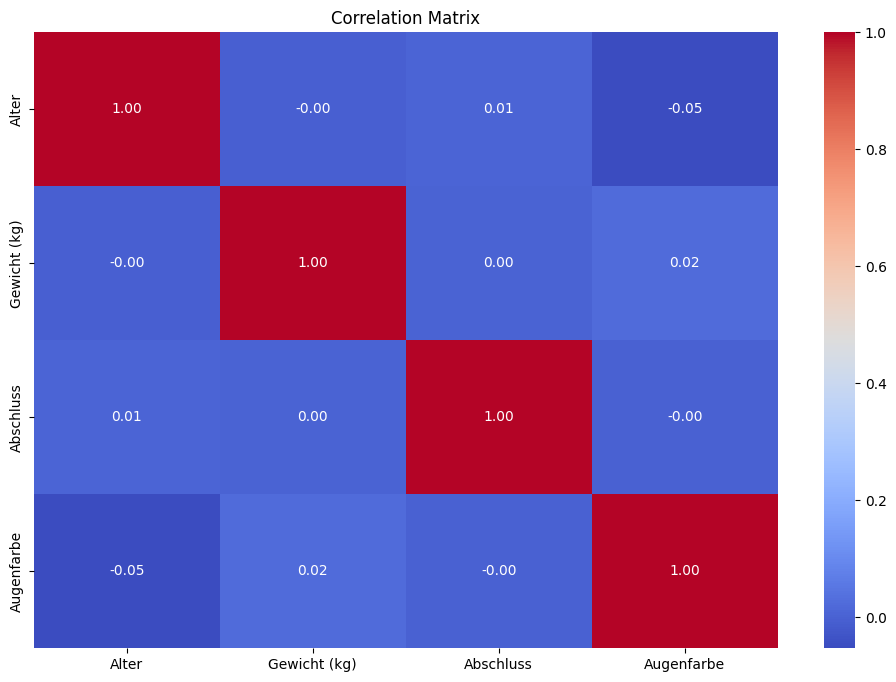

In [40]:
# Calculate the Pearson correlation matrix (We can see now that there are no highly correlated features)
correlation_matrix = ohne_konstante_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [41]:
# Automatically remove highly correlated features
corr = ohne_konstante_data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = ohne_konstante_data.columns[columns]
print(selected_columns.shape)
X = ohne_konstante_data[selected_columns]
X.head()

(4,)


,Alter,Gewicht (kg),Abschluss,Augenfarbe
0,0.658537,0.333333,0.8,0.000000
1,0.085366,0.783333,0.0,1.000000
2,0.341463,0.716667,0.4,0.666667
3,0.500000,0.166667,0.8,1.000000
4,0.390244,0.800000,1.0,0.666667


In [42]:
X.shape
y = target.astype(int)  # Convert y to integer classes for classification

In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (1886, 4)
Testing Features Shape: (472, 4)
Training Target Shape: (1886,)
Testing Target Shape: (472,)


In [44]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [45]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
y_pred_train = clf.predict(X_train)
print("Training Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Accuracy: 0.996288441145281
Test Accuracy: 0.7923728813559322


In [47]:
# Using the grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7603385120626499


Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.87      0.93      0.90        59
           2       0.90      0.91      0.91        47
           3       0.75      0.92      0.83        52
           4       0.44      0.23      0.30        53
           5       0.70      0.88      0.78        50
           6       0.87      0.86      0.86        56
           7       0.83      0.68      0.75        57
           8       0.74      0.72      0.73        47

    accuracy                           0.79       472
   macro avg       0.77      0.79      0.78       472
weighted avg       0.78      0.79      0.78       472

Accuracy: 0.7923728813559322
Precision (macro): 0.7741953411577556
Recall (macro): 0.7934829625606807
F1 Score (macro): 0.7762855732041115


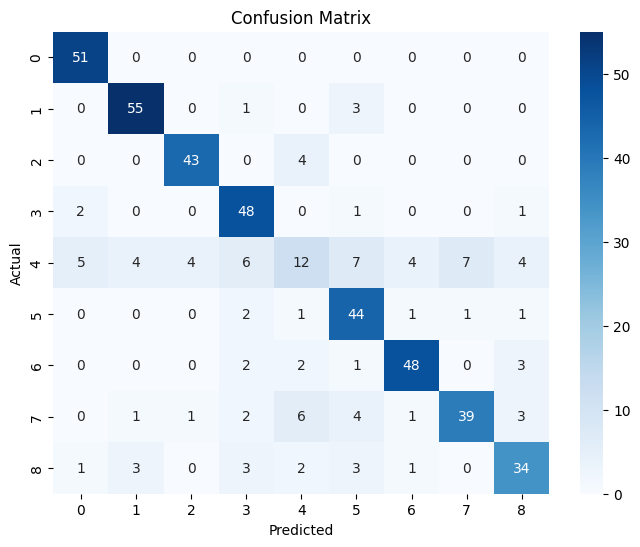

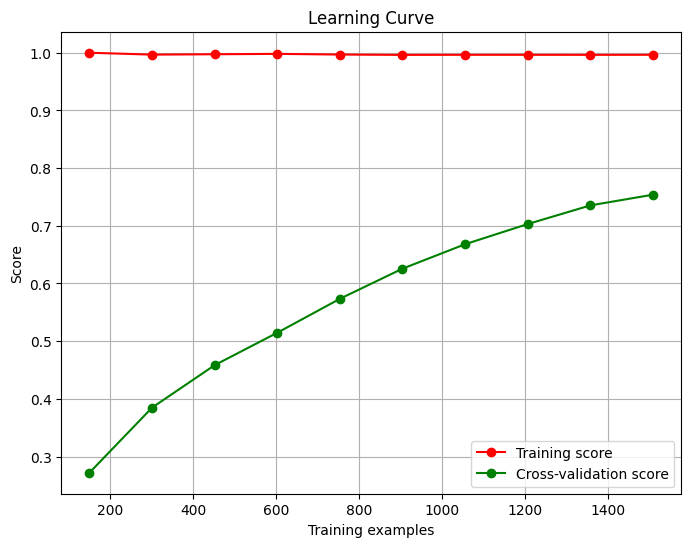

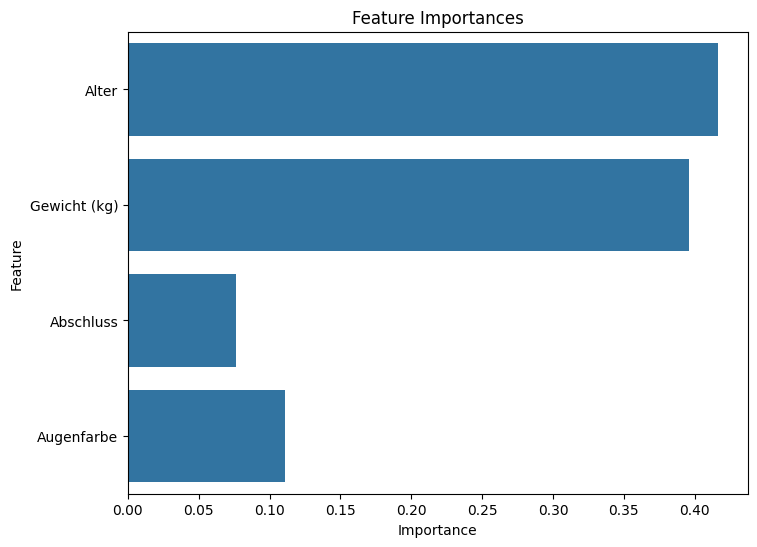

In [48]:
from sklearn.model_selection import learning_curve
import seaborn as sns
import numpy as np

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix, 
)
import matplotlib.pyplot as plt

# 1. Classification Report & Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()



# 4. Feature Importance
if hasattr(clf, "feature_importances_"):
    plt.figure(figsize=(8,6))
    sns.barplot(x=clf.feature_importances_, y=X.columns)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

We can notice that the performance has improved alot and that was due mainly two reasons:
1. We solve the imbalanced dataset issue.
2. we Added more samples to the dataset so that the overfittig problem soved